### Tên : Huỳnh Ngọc Công Danh
### MSSV : 19521322

In [35]:
from keras.applications.vgg16 import VGG16
import numpy as np
model = VGG16()
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [7]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [15]:
from keras.preprocessing.image import load_img
from keras.preprocessing import image
def getImages():
  l_path = []
  n_folder = ['human','dog','cat']
  for i in n_folder:
    for j in range(1,4):
      p = '/content/gdrive/MyDrive/data_img/{}/{}.jpg'.format(i,j)
      l_path.append(p)
  return l_path
paths = getImages()
paths

['/content/gdrive/MyDrive/data_img/human/1.jpg',
 '/content/gdrive/MyDrive/data_img/human/2.jpg',
 '/content/gdrive/MyDrive/data_img/human/3.jpg',
 '/content/gdrive/MyDrive/data_img/dog/1.jpg',
 '/content/gdrive/MyDrive/data_img/dog/2.jpg',
 '/content/gdrive/MyDrive/data_img/dog/3.jpg',
 '/content/gdrive/MyDrive/data_img/cat/1.jpg',
 '/content/gdrive/MyDrive/data_img/cat/2.jpg',
 '/content/gdrive/MyDrive/data_img/cat/3.jpg']

In [55]:
from keras.applications.vgg16 import preprocess_input
def extract_feature(img_path,model):
  img = image.load_img(img_path, target_size=(224, 224))
  img_data = image.img_to_array(img)
  img_data = np.expand_dims(img_data, axis=0)
  img_data = preprocess_input(img_data)
  vgg16_feature = model.predict(img_data)
  return vgg16_feature
l_features = []
for i in paths:
  f = extract_feature(paths[0],model)
  vgg16_feature_np = np.array(f)
  vgg16_feature_np = vgg16_feature_np.reshape(vgg16_feature_np.shape[0],-1)
  l_features.append(vgg16_feature_np.flatten())
l_features = np.array(l_features)
l_features[0].shape

(1000,)

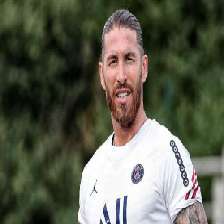

In [46]:
path_query = '/content/gdrive/MyDrive/data_img/query/1.jpg'
query = load_img(path_query,target_size=(224, 224))
query

In [88]:
def load_query(path_query,mode):
  query_feature = extract_feature(path_query,model)
  vgg16_feature_np = np.array(query_feature)
  vgg16_feature_np = vgg16_feature_np.reshape(vgg16_feature_np.shape[0],-1)
  query = vgg16_feature_np.flatten()
  return query.reshape(1,-1)

In [72]:
from sklearn.neighbors import NearestNeighbors
model_k = NearestNeighbors(n_neighbors=3)
model_k.fit(l_features,np.array(paths))

NearestNeighbors(n_neighbors=3)

0


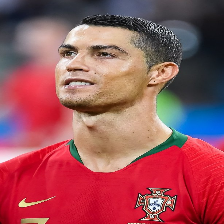

1


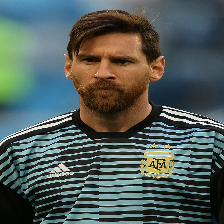

2


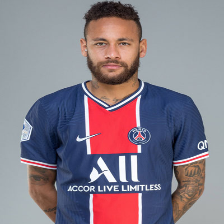

In [89]:
import cv2
from google.colab.patches import cv2_imshow
query1 = load_query(path_query,model)
r = model_k.kneighbors(query1,return_distance=False)
# result_img = load_img(r[0],target_size=(224,224))
# result_img
for i in r[0]:
  # print(paths[i])
  print(i)
  img = cv2.imread(paths[i])
  img = cv2.resize(img,(224,224))
  cv2_imshow(img)
  